# <center> Fall 2021 CS559: Homework #1 </center>

### <center> Due: **9/23/2021 Thursday 11:59 PM** </center>



- Before you start, rename the file as *LastNameFirstName*_F21_CS559_HW1 (e.g., JangInsuk_F21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [20 pts]
This problem task to implement functions of matrix operations - multiplication and tranpose. Please do not use numpy matrix packages in implementations.  

1-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

In [1]:
import numpy as np

In [2]:
### Code Starts Here
def mat_product(A,B):
    #A shape = m x n 
    #B shape = n x p
    #output shape = m x p
    a_shape = A.shape
    b_shape = B.shape
#     print(A)
#     print(B)
    print(f'Output shape: {A.shape[0]}x{B.shape[1]}')
    new_array = []
    for idx1 in range(0, a_shape[0]):
        elements = []
        row = A[idx1, :]
        for idx2 in range(0, b_shape[1]):
            col = B[:, idx2]
            prod = sum(row * col)
            elements.append(prod)
            
        new_array.append(elements)
    return new_array
            

1-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [2 pts]

In [3]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(0, 11, size = (3,3))
Y=np.random.randint(0, 11, size = (3,3))

In [4]:
print(mat_product(X,Y))
print(np.dot(X, Y))

Output shape: 3x3
[[18, 26, 36], [30, 41, 36], [3, 13, 135]]
[[ 18  26  36]
 [ 30  41  36]
 [  3  13 135]]


1-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [10 pts]


In [5]:
### Code Starts Here
def mat_transpose(X):
    return X.transpose()

In [6]:
Z=mat_product(mat_transpose(X),Y)
print(Z)

Output shape: 3x3
[[27, 38, 27], [18, 26, 45], [3, 10, 144]]


In [7]:
### Code np.matmul() starts here
Z=np.matmul(mat_transpose(X), Y)
print(Z)

[[ 27  38  27]
 [ 18  26  45]
 [  3  10 144]]


### Problem 2 [20 pts]
2-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". 
   

In [8]:
### Code Starts Here
import pandas as pd
def coin_prob(pi,n,k):
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    pieces = []
    for trials in range(50, 10050, 50): 
        print(f'Running {trials}', end = '\r')
        s = np.random.binomial(n, pi, trials)
        prob = sum(s == k) / trials
        row = pd.Series([trials, prob], index = ['t', 's'])
        pieces.append(pd.DataFrame(row).transpose())
        
    ProbTable= pd.concat(pieces) #pd.DataFrame()
    return ProbTable 

2-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [5 pts]

In [9]:
one_coins=coin_prob(pi=.5,n=1,k=1)
one_coins

,t,s
0,50.0,0.420000
0,100.0,0.460000
0,150.0,0.486667
0,200.0,0.510000
0,250.0,0.552000
...,...,...
0,9800.0,0.497143
0,9850.0,0.506802
0,9900.0,0.500606
0,9950.0,0.497085


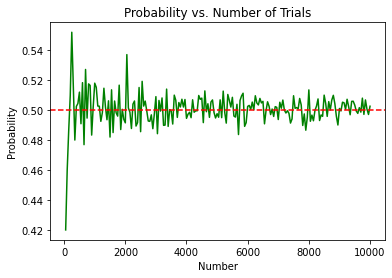

In [10]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coins.t, one_coins.s, 'g-')
plt.axhline(y=.5, color='r', linestyle='--')
plt.xlabel('Number')
plt.ylabel('Probability')
plt.title('Probability vs. Number of Trials')
plt.show()

2-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [5 pts]

In [11]:
### Code starts here
#{hhh, hht, hth, htt, thh, tht, tth, ttt}
successful_events = 3 
total_space = 8
p = successful_events/ total_space
print(f'The probability of having ONLY 1 head is: {p}') 

The probability of having ONLY 1 head is: 0.375


2-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [12]:
three_coins=coin_prob(pi=.5,n=3,k=1)

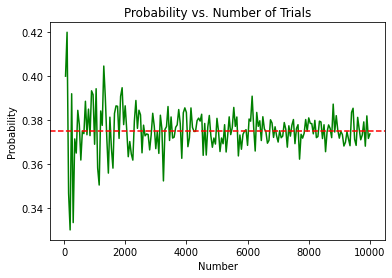

In [13]:
"""Plot shows here"""
import matplotlib.pyplot as plt

plt.plot(three_coins.t, three_coins.s, 'g-')
plt.axhline(y=p, color='r', linestyle='--')
plt.xlabel('Number')
plt.ylabel('Probability')
plt.title('Probability vs. Number of Trials')
plt.show()

### Problem 3 [20 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [14]:
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')
# print(Country.columns, gdp.columns)

3-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [15]:
### Code Starts Here
Country_GDP = pd.merge(left = Country, right = gdp, on = 'CountryCode', how = 'outer')
index_1 = Country.CountryCode
index_2 = gdp.CountryCode
unmatched = pd.Series([i for i in index_1 if i not in index_2] + [i for i in index_2 if i not in index_1]).unique()
matched = Country[Country.CountryCode.isin(gdp.CountryCode.unique())]

In [16]:
### Print the number of IDs
print(f'Ummatched Rows: {len(unmatched)}\nMatched Rows: {len(matched)}')

Ummatched Rows: 235
Matched Rows: 189


3-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

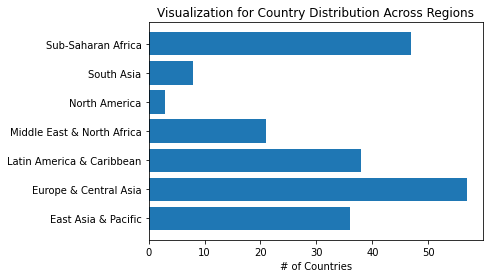

In [17]:
### Code Starts Here
import matplotlib.pyplot as plt
grouped = Country_GDP.groupby('Region').CountryCode.count()
grouped
plt.barh(y = grouped.index, width = grouped.values)
plt.title('Visualization for Country Distribution Across Regions')
plt.xlabel('# of Countries')
plt.show()

3-c: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

In [18]:
### Code Starts Here
from scipy.stats import ks_2samp
Country_GDP['GDPNew'] = Country_GDP.GDP.map(lambda x: None if str(x) == 'nan' else int(''.join([i for i in x.strip() if i != ','])))
rand_regions = np.random.randint(0, len(grouped), size = 2)

unique_regions = [i for i in Country_GDP.Region.unique() if str(i) != 'nan']
pieces = []
for region1 in unique_regions:
    data1 = Country_GDP[Country_GDP.Region == region1].GDPNew.values
    for region2 in unique_regions:
        if region1 == region2:
            continue
        data2 = Country_GDP[Country_GDP.Region == region2].GDPNew.values
        ks_test = ks_2samp(data1, data2)
        stat = ks_test.statistic
        p = ks_test.pvalue
        series_row = pd.Series([region1, region2, stat, p], index = ['region1', 'region2', 'statistic', 'pvalue'])
        pieces.append(pd.DataFrame(series_row).transpose())
final_df = pd.concat(pieces)
similar_dist = final_df[final_df.pvalue <= .05]
similar_dist

,region1,region2,statistic,pvalue
0,Latin America & Caribbean,Europe & Central Asia,0.298246,0.029508
0,Latin America & Caribbean,Sub-Saharan Africa,0.344905,0.009573
0,Latin America & Caribbean,Middle East & North Africa,0.478697,0.00228
0,Europe & Central Asia,Latin America & Caribbean,0.298246,0.029508
0,Europe & Central Asia,Sub-Saharan Africa,0.595371,0.0
0,Europe & Central Asia,East Asia & Pacific,0.305556,0.024806
0,Sub-Saharan Africa,Latin America & Caribbean,0.344905,0.009573
0,Sub-Saharan Africa,Europe & Central Asia,0.595371,0.0
0,Sub-Saharan Africa,Middle East & North Africa,0.782168,0.0
0,Sub-Saharan Africa,East Asia & Pacific,0.463948,0.000162


- The values shown above are regions that have a similar GDP distribution.  This can be deduced because we used two-sided ks_2samp test, which has a null hypothesis that F(x) = G(x). Because this is our null hypothesis, and that our alpha value is .05, there is a significance when the pvalue is less than our alpha value (shown in the table above).  Therefore, the rows where the pvalue is less than .05 shows the regions that have very similar GDP distributions

3-d: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [19]:
### Code Starts Here
grouped = Country_GDP.groupby('Income Group').agg(['mean', 'std'])['GDPNew']
grouped

,mean,std
Income Group,,
High income: OECD,1.483917e+06,3.070464e+06
High income: nonOECD,1.043498e+05,1.653344e+05
Low income,1.441078e+04,2.047309e+04
Lower middle income,2.566635e+05,1.139620e+06
Upper middle income,2.318478e+05,4.768720e+05


### Problem 4 - Clustering Using KMeans [20 pts]

The tasks in this problem are:
- impletemenation of KMeans
- confirmation of pre-determined K value

Here, we have a given data set `HW1_Q1_0.csv` containing coordinates of x and y. 

4-a. Load the data and add feature name as X and Y for the first and second columns, respectively. (2 pts)

In [20]:
import pandas as pd

In [21]:
### Code starts here
data = pd.read_csv('HW1_Q1_0.csv', names = ['x', 'y'])
data

,x,y
0,-0.452720,-0.018213
1,-0.169793,1.073745
2,1.128729,-2.395042
3,0.122506,-0.973069
4,-0.409200,0.129649
...,...,...
820,0.944727,0.365376
821,-0.161625,-0.358271
822,0.147787,0.905077
823,-0.159311,0.425800


4-b. Using `KMeans` from `sklearn.cluster`, determine the appropriate $K$ value for `HW2_Q1_0.csv` and report it. Explain why your pre-determined $K$ value is appropriate. The function `plot_inertia` is provided to you. (4 pts)

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans()

def plot_inertia(km, X, n_cluster_range):
    inertias = []
    for i in range(1, n_cluster_range+1):
        km.set_params(n_clusters=i)
        km.fit(X)
        inertias.append(km.inertia_)
    print(inertias)
    plt.plot(range(1, n_cluster_range+1), inertias, marker='o')
    plt.title('Elbow method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
    tabular_result = pd.DataFrame(inertias, 
                                  index = ["n = {}".format(i) for i in range(1, len(inertias)+1)], 
                                  columns=['Inertia'])
    
    return tabular_result

[1462.008529637188, 555.4252228857343, 416.0902173768934, 322.7119128361543, 230.50020859442708, 193.74063234879802, 159.29853138902078, 137.16911996397735, 119.50646389465419, 106.90244350818696]


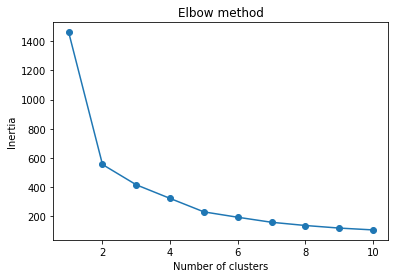

,Inertia
n = 1,1462.008530
n = 2,555.425223
n = 3,416.090217
n = 4,322.711913
n = 5,230.500209
n = 6,193.740632
n = 7,159.298531
n = 8,137.169120
n = 9,119.506464
n = 10,106.902444


In [23]:
plot_inertia(kmeans, data.values, 10)

Based on the elbow plot above, the best `k` value is 6.  The reason 5 is the best is because after k = 6, the Inertia value changes only slightly, indicating that there is no additional value after k = 6.  By using k = 6 instead of a higher cluster number, we are saving ourselves from computing more than we have to while maintaining the variability within our data. 

4-c. Make a scatter plot of y vs. x. Do you think your pre-determined $K$ value is acceptable. Explain why. If you do not think your pre-determined $K$ value is not correct, explain what a new pre-determined $K$ value must be. (4 pts) 

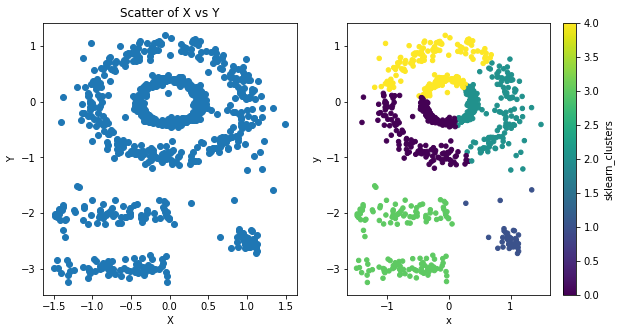

In [24]:
### Code starts here
kmeans = KMeans(n_clusters = 5)
kmeans.fit(data.values)
data['sklearn_clusters'] = kmeans.labels_
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].scatter(data.x.values, data.y.values)
ax[0].set_title('Scatter of X vs Y')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
data.plot.scatter('x', 'y', ax = ax[1], c = 'sklearn_clusters', colormap = 'viridis')
plt.show()

Based on the scatter plot above, I believe a `k` value of 6 is a acceptable.  In the graph, we can see at least 5 regions that are seperate from one another - which is substantiated when marking each point with a color based on that points cluster value. 

4-d. Impletement `MY_KMean` that does the KMeans clustering. When you do the implementation, you may use linear algebra built-in functions from `Numpy`. Do not use `KMeans` directly. (10 pts)

In [26]:
### Code starts here
from scipy.spatial.distance import cdist

def get_closest(row, centroid_dict):
    row = row.drop(labels = [i for i in row.index if 'cluster' in i])
    min_array = []
    row_values = row.values.reshape(1, -1)
    for clust, centroid in centroid_dict.items():
        dist = np.sqrt(np.array((row_values - centroid)**2).sum())
#         scipy_dist = cdist(row_values, centroid, metric = 'euclidean')
        min_array.append([clust, dist])
    min_array = np.array(min_array)
    min_cluster = min_array[min_array.argmin(axis = 0)[1]][0]
    return min_cluster
        
def implement_kmeans(data: pd.DataFrame, k: int, n_iter: int):
    data_copy = data.copy()
    cluster_labels = list(range(0, k))
    data_copy['random_clusters'] = [np.random.randint(0, k) for i in range(len(data_copy))]
    for i in range(0, n_iter):
        print(f'Iteration: {i}', end = '\r')
        centroid_dict = {}
        for clust in data_copy.random_clusters.unique():
            subset = data_copy[data_copy.random_clusters == clust][[i for i in data_copy.columns if 'cluster' not in i]]
            centroid_dict[clust] = np.array([subset[c].mean() for c in subset.columns]).reshape(1, -1)
        data_copy['random_clusters'] = data_copy.apply(get_closest, axis = 1, args = (centroid_dict,))
    return data_copy.random_clusters.values

data['custom_kmeans'] = implement_kmeans(data, 5, 100)

Text(0.5, 1.0, 'Custom KMeans Implementation')

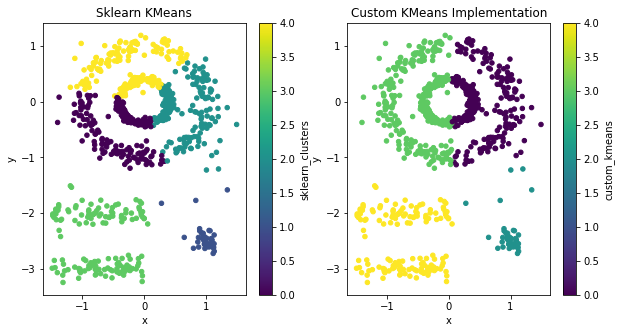

In [27]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
data.plot.scatter('x', 'y', ax = ax[0], c = 'sklearn_clusters', colormap = 'viridis')
data.plot.scatter('x', 'y', ax = ax[1], c = 'custom_kmeans', colormap = 'viridis')
ax[0].set_title('Sklearn KMeans')
ax[1].set_title('Custom KMeans Implementation')

### Problem 5 - Principal Component Analysis [20 pts]

5-a. Run the following codes. 

In [28]:
import numpy as np

np.random.seed(2342)
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 30).T
assert class1_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 30).T
assert class2_sample.shape == (3,30), "The matrix has not the dimensions 3x30"

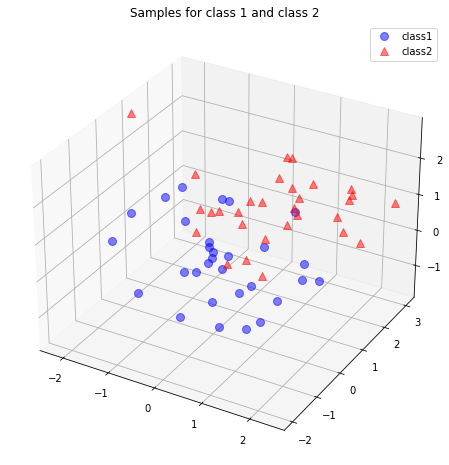

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

5-b. PCA Implementation. Here, the descriiption of each step and part of codes. You have to fill out the rest process. [15 pts]

1. Take the dataset w/o classes. 
2. Compute the d-dimentional mean vector.
3. Compute the scatter matrix as following. 
    
$$\textbf{S}=\sum_{k=1}^N (\textbf{x}_k-\bar{\textbf{x}})(\textbf{x}_k-\bar{\textbf{x}})^T$$ 
where $\bar{\textbf{x}}$ is the mean vector. Then compute the covariance matrix using `np.cov()` function.
    
4. Compute eigenvectors and corresponding eigenvalues using np.linalg.eig(). 
5. Check the eigenvector and eigenvalue calculation. This code is provided as well as the visualization of eigenvectors. 
6. Sort the eigenvectors by descreasing eigenvalues. The idea is that since the eigenvectors will form the axes of new feature subspace, we want to drop for eigenvectors with the lowest eigenvalues that bear the least information about the distribution of the data. 
7. Choose $k$ eigenvectors with the largest eigenvalues. We are going to reduce a 3-D feature space to a 2-D feature subspace. To do so, we combine the two eigenvectors with the highest eigenvalues to construct our $d\times k$-D eigenvector matrix $\bf{W}$.
8. Transform the samples onto the new subspace. The new subspace equation is 

$${\bf y}={\bf W}^T\times {\bf x}$$

In [30]:
def pca_implementation(dataset, k):
    print(f'Shape of Dataset: {dataset.shape}')
    mean_vector = np.mean(dataset, axis = 0)
    print(f'Mean Vector Shape {mean_vector.shape}')
    centered = dataset - mean_vector
    covariance = np.cov(centered)
    values, vectors = np.linalg.eig(covariance)
    values = np.array([[idx, i] for idx, i in enumerate(values)])
    values = values[values[:,1].argsort()]
    k_largest_values = values[len(values) - k: len(values), :]
    k_largest_idx = k_largest_values[:, 0]
    projected_values = vectors.transpose().dot(centered)
#     print(projected_values.shape)
    projected_values = projected_values[:, [int(i) for i in k_largest_idx]]
    print(f'Final Shape After PCA: {projected_values.shape}')
#     projected_values = np.sort(projected_values, axis = 0)
    return projected_values
    
dataset = np.vstack([class1_sample, class2_sample])
projected_values = pca_implementation(dataset, k = 3)


Shape of Dataset: (6, 30)
Mean Vector Shape (30,)
Final Shape After PCA: (6, 3)


5-c. Using `PCA` from sklearn, make a visualization comparison with the result in 3-b and evaluation your impletemented PCA. [5 pts]

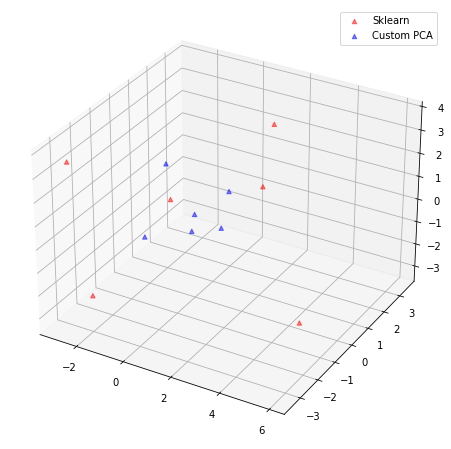

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
transformed_data = pca.fit_transform(dataset)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.scatter(transformed_data[:, 0], transformed_data[:,1], transformed_data[:,2], alpha = .5, color = 'red', marker = '^', label = 'Sklearn')
ax.scatter(projected_values[:, 0], projected_values[:,1], projected_values[:,2], alpha = .5, color = 'blue', marker = '^', label = 'Custom PCA')

plt.legend()
plt.show()